# 📚 Comandos Básicos de Ciencia de Datos

**Material de enseñanza** — Guía práctica con ejemplos usando el dataset de precios de tortilla en México.

En este cuaderno aprenderás los comandos fundamentales de Pandas para explorar, limpiar y analizar datos. Utilizaremos un dataset real con precios de tortilla por kilogramo en distintas ciudades de México (2007-2016).

---
## 1. Importar librerías y cargar datos

La primera tarea en cualquier proyecto de ciencia de datos es **importar las librerías** necesarias. Pandas es la biblioteca estándar para manipulación de datos en Python.

In [1]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('tortilla_prices.csv')

# Renombrar columnas al español para mayor claridad
df.columns = ['Estado', 'Ciudad', 'Año', 'Mes', 'Día', 'Tipo de tienda', 'Precio por kilogramo']

print("Datos cargados correctamente")
df.head()

Datos cargados correctamente


,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


**Explicación:**
- `pd.read_csv()` — Carga un archivo CSV y lo convierte en un DataFrame
- `df.columns` — Permite ver o asignar los nombres de las columnas

---
## 2. Exploración inicial: ver los primeros y últimos registros

Antes de analizar, necesitamos **explorar** los datos. Los comandos `head()` y `tail()` muestran los primeros y últimos registros del DataFrame.

In [2]:
# Ver los primeros 5 registros (por defecto)
df.head()

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [3]:
# Ver los primeros 10 registros
df.head(10)

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.0
6,Coahuila,Saltillo,2007,1,10,Mom and Pop Store,NaN
7,Colima,Colima,2007,1,10,Mom and Pop Store,10.0
8,Chiapas,Tapachula,2007,1,10,Mom and Pop Store,NaN
9,Chiapas,Tuxtla Gutiérrez,2007,1,10,Mom and Pop Store,9.2


In [4]:
# Ver los últimos 5 registros
df.tail()

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
300481,Veracruz,Coatzacoalcos,2025,7,9,Big Retail Store,13.50
300482,Veracruz,Veracruz,2025,7,9,Big Retail Store,13.00
300483,Veracruz,Xalapa,2025,7,9,Big Retail Store,12.83
300484,Yucatán,Mérida,2025,7,9,Big Retail Store,13.17
300485,Zacatecas,Zacatecas,2025,7,9,Big Retail Store,13.50


In [5]:
traductor={
    "Mom and Pop Store":"Tortilleria",
    "Big Retail Store":"Supermercado"
}
df["Tipo de tienda"]=df["Tipo de tienda"].replace(traductor)
df

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
0,Aguascalientes,Aguascalientes,2007,1,10,Tortilleria,9.90
1,Baja California,Mexicali,2007,1,10,Tortilleria,NaN
2,Baja California,Tijuana,2007,1,10,Tortilleria,10.00
3,Baja California Sur,La Paz,2007,1,10,Tortilleria,10.00
4,Campeche,Campeche,2007,1,10,Tortilleria,10.00
...,...,...,...,...,...,...,...
300481,Veracruz,Coatzacoalcos,2025,7,9,Supermercado,13.50
300482,Veracruz,Veracruz,2025,7,9,Supermercado,13.00
300483,Veracruz,Xalapa,2025,7,9,Supermercado,12.83
300484,Yucatán,Mérida,2025,7,9,Supermercado,13.17


---
## 3. Dimensiones y estructura del DataFrame

Conocer el **tamaño** y la **estructura** del dataset es fundamental para planificar el análisis.

In [6]:
# shape: retorna (filas, columnas)
print("Dimensiones del DataFrame:")
print(f"  Filas: {df.shape[0]}")
print(f"  Columnas: {df.shape[1]}")
print(f"  Total: {df.shape[0] * df.shape[1]} celdas")

Dimensiones del DataFrame:
  Filas: 300486
  Columnas: 7
  Total: 2103402 celdas


In [7]:
# columns: lista los nombres de todas las columnas
print("Columnas del dataset:")
df.columns.tolist()

Columnas del dataset:


['Estado',
 'Ciudad',
 'Año',
 'Mes',
 'Día',
 'Tipo de tienda',
 'Precio por kilogramo']

In [8]:
# info(): muestra tipo de datos, valores no nulos y memoria utilizada
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 300486 entries, 0 to 300485
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Estado                300486 non-null  str    
 1   Ciudad                300486 non-null  str    
 2   Año                   300486 non-null  int64  
 3   Mes                   300486 non-null  int64  
 4   Día                   300486 non-null  int64  
 5   Tipo de tienda        300486 non-null  str    
 6   Precio por kilogramo  294096 non-null  float64
dtypes: float64(1), int64(3), str(3)
memory usage: 16.0 MB


---
## 4. Estadísticas descriptivas

El método `describe()` genera un **resumen estadístico** automático de las columnas numéricas: conteo, media, desviación estándar, mínimo, cuartiles y máximo.

In [9]:
df.describe()

,Año,Mes,Día,Precio por kilogramo
count,300486.000000,300486.000000,300486.000000,294096.000000
mean,2015.748890,6.362513,15.934922,12.615429
std,5.309467,3.418766,8.752586,4.888099
min,2007.000000,1.000000,1.000000,0.000000
25%,2011.000000,3.000000,8.000000,9.700000
50%,2016.000000,6.000000,16.000000,11.500000
75%,2020.000000,9.000000,24.000000,14.500000
max,2025.000000,12.000000,31.000000,31.710000


In [10]:
# Estadísticas de una columna específica
print("Precio por kilogramo - Estadísticas:")
print(f"  Media: {df['Precio por kilogramo'].mean():.2f} pesos")
print(f"  Mediana: {df['Precio por kilogramo'].median():.2f} pesos")
print(f"  Mínimo: {df['Precio por kilogramo'].min():.2f} pesos")
print(f"  Máximo: {df['Precio por kilogramo'].max():.2f} pesos")
print(f"  Desviación estándar: {df['Precio por kilogramo'].std():.2f}")

Precio por kilogramo - Estadísticas:
  Media: 12.62 pesos
  Mediana: 11.50 pesos
  Mínimo: 0.00 pesos
  Máximo: 31.71 pesos
  Desviación estándar: 4.89


---
## 5. Selección de columnas

Puedes seleccionar **una o varias columnas** de diferentes maneras.

In [11]:
# Seleccionar una columna (devuelve una Serie)
precios = df['Precio por kilogramo']
precios.head()

0     9.9
1     NaN
2    10.0
3    10.0
4    10.0
Name: Precio por kilogramo, dtype: float64

In [14]:
# Seleccionar varias columnas (devuelve un DataFrame)
df2=df[['Estado', 'Ciudad', 'Precio por kilogramo']]
df2

,Estado,Ciudad,Precio por kilogramo
0,Aguascalientes,Aguascalientes,9.90
1,Baja California,Mexicali,NaN
2,Baja California,Tijuana,10.00
3,Baja California Sur,La Paz,10.00
4,Campeche,Campeche,10.00
...,...,...,...
300481,Veracruz,Coatzacoalcos,13.50
300482,Veracruz,Veracruz,13.00
300483,Veracruz,Xalapa,12.83
300484,Yucatán,Mérida,13.17


---
## 6. Valores únicos y conteo

Para columnas categóricas, `unique()` y `value_counts()` nos ayudan a entender la **distribución** de las categorías.

In [15]:
# unique(): obtiene los valores únicos de una columna
print("Estados en el dataset:")
df['Estado'].unique()

Estados en el dataset:


<StringArray>
[     'Aguascalientes',     'Baja California', 'Baja California Sur',
            'Campeche',            'Coahuila',              'Colima',
             'Chiapas',           'Chihuahua',                'D.F.',
             'Durango',          'Guanajuato',            'Guerrero',
             'Hidalgo',             'Jalisco',         'Edo. México',
           'Michoacán',             'Morelos',             'Nayarit',
          'Nuevo León',              'Oaxaca',              'Puebla',
           'Querétaro',        'Quintana Roo',     'San Luis Potosí',
             'Sinaloa',              'Sonora',             'Tabasco',
          'Tamaulipas',            'Tlaxcala',            'Veracruz',
             'Yucatán',           'Zacatecas']
Length: 32, dtype: str

In [16]:
# value_counts(): cuenta cuántas veces aparece cada valor
print("Registros por tipo de tienda:")
df['Tipo de tienda'].value_counts()

Registros por tipo de tienda:


Tipo de tienda
Tortilleria    150929
Super          149557
Name: count, dtype: int64

In [17]:
# Con normalize=True obtenemos proporciones (porcentajes)
df['Tipo de tienda'].value_counts(normalize=True).round(2)

Tipo de tienda
Tortilleria    0.5
Super          0.5
Name: proportion, dtype: float64

---
## 7. Filtrado de datos

Filtrar nos permite **extraer subconjuntos** de datos que cumplen ciertas condiciones.

In [17]:
# Filtrar: solo registros de la Ciudad de México (D.F.)
df_pachuca = df[df['Estado'] == 'Hidalgo']
df_pachuca

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
20,Hidalgo,Pachuca,2007,1,10,Tortilleria,9.00
73,Hidalgo,Pachuca,2007,1,12,Tortilleria,9.00
126,Hidalgo,Pachuca,2007,1,15,Tortilleria,9.00
179,Hidalgo,Pachuca,2007,1,16,Tortilleria,9.00
232,Hidalgo,Pachuca,2007,1,17,Tortilleria,9.00
...,...,...,...,...,...,...,...
300237,Hidalgo,Pachuca,2025,6,30,Super,13.77
300291,Hidalgo,Pachuca,2025,7,2,Super,13.77
300345,Hidalgo,Pachuca,2025,7,4,Super,13.77
300399,Hidalgo,Pachuca,2025,7,7,Super,13.77


In [18]:
df_pachuca[df_pachuca["Precio por kilogramo"]>=16]

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
230753,Hidalgo,Pachuca,2021,5,3,Tortilleria,17.0
230806,Hidalgo,Pachuca,2021,5,7,Tortilleria,17.0
230859,Hidalgo,Pachuca,2021,5,10,Tortilleria,17.0
230912,Hidalgo,Pachuca,2021,5,12,Tortilleria,17.0
230965,Hidalgo,Pachuca,2021,5,14,Tortilleria,17.0
...,...,...,...,...,...,...,...
296079,Hidalgo,Pachuca,2025,6,30,Tortilleria,23.5
296133,Hidalgo,Pachuca,2025,7,2,Tortilleria,23.5
296187,Hidalgo,Pachuca,2025,7,4,Tortilleria,23.5
296241,Hidalgo,Pachuca,2025,7,7,Tortilleria,23.5


In [19]:
# Múltiples condiciones con & (AND) y | (OR)
# Precios entre 10 y 12 pesos en el año 2010
df[(df['Precio por kilogramo'] >= 10) & 
   (df['Precio por kilogramo'] <= 12) & 
   (df['Año'] == 2010)]

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
47371,Baja California,Tijuana,2010,1,4,Tortilleria,11.25
47372,Baja California Sur,La Paz,2010,1,4,Tortilleria,12.00
47373,Campeche,Campeche,2010,1,4,Tortilleria,10.75
47374,Coahuila,Piedras Negras,2010,1,4,Tortilleria,11.00
47376,Colima,Colima,2010,1,4,Tortilleria,11.00
...,...,...,...,...,...,...,...
55258,Tamaulipas,Tampico,2010,12,31,Tortilleria,11.33
55260,Veracruz,Coatzacoalcos,2010,12,31,Tortilleria,11.75
55261,Veracruz,Poza Rica,2010,12,31,Tortilleria,12.00
55262,Veracruz,Veracruz,2010,12,31,Tortilleria,11.00


---
## 8. Valores faltantes (NaN)

En datasets reales es común encontrar **valores faltantes**. Pandas los representa como `NaN` (Not a Number).

In [20]:
# isnull(): identifica valores faltantes (True = falta el valor)
# sum() cuenta cuántos hay por columna
print("Valores faltantes por columna:")
df.isnull().sum()

Valores faltantes por columna:


Estado                     0
Ciudad                     0
Año                        0
Mes                        0
Día                        0
Tipo de tienda             0
Precio por kilogramo    6390
dtype: int64

In [22]:
# Porcentaje de valores faltantes
(df.isnull().sum() / len(df) * 100).round(2)

Estado                  0.00
Ciudad                  0.00
Año                     0.00
Mes                     0.00
Día                     0.00
Tipo de tienda          0.00
Precio por kilogramo    2.13
dtype: float64

In [22]:
# dropna(): eliminar filas con valores faltantes
df_limpio = df.dropna(subset=['Precio por kilogramo'])
print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar NaN en precio: {len(df_limpio)}")

Filas originales: 300486
Filas después de eliminar NaN en precio: 294096


In [ ]:
# fillna(): reemplazar valores faltantes (ej: con la mediana)
# df['Precio por kilogramo'].fillna(df['Precio por kilogramo'].median())

---
## 9. Agrupación (groupby)

`groupby` es uno de los comandos más poderosos: **agrupa** los datos por una o más columnas y aplica funciones de agregación.

In [23]:
# Precio promedio por estado (usando datos limpios)
precio_por_estado = df_limpio.groupby('Estado')['Precio por kilogramo'].mean().sort_values(ascending=False)
precio_por_estado

Estado
Sonora                 14.253868
Baja California        13.999285
Coahuila               13.654932
Tamaulipas             13.447464
Yucatán                13.404395
Baja California Sur    13.346343
Morelos                13.260840
Quintana Roo           13.226154
Guerrero               13.201335
Sinaloa                13.192936
Chihuahua              13.134627
Colima                 13.060772
Nayarit                12.952791
Nuevo León             12.940694
Campeche               12.882263
Tabasco                12.785352
Querétaro              12.605633
Durango                12.368322
Jalisco                12.060140
Oaxaca                 12.054889
San Luis Potosí        11.972931
Guanajuato             11.904530
Michoacán              11.864962
Veracruz               11.753152
Chiapas                11.749479
Zacatecas              11.654993
Aguascalientes         11.613236
Hidalgo                11.444489
Edo. México            11.382328
D.F.                   11.324045
Pue

In [26]:
# Múltiples agregaciones a la vez
df_limpio.groupby('Tipo de tienda')['Precio por kilogramo'].agg(['mean', 'min', 'max', 'count'])

,mean,min,max,count
Tipo de tienda,,,,
Super,10.142718,0.0,21.73,146334
Tortilleria,15.064242,7.0,31.71,147762


---
## 10. Ordenar datos

Ordenar filas por los valores de una o más columnas facilita la **exploración** y presentación de resultados.

In [27]:
# sort_values(): ordenar por una columna
# ascending=False para orden descendente (mayor a menor)
df_limpio.sort_values('Precio por kilogramo', ascending=False).head(10)

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
293359,Baja California,Mexicali,2025,2,26,Tortilleria,31.71
295303,Baja California,Mexicali,2025,5,28,Tortilleria,31.71
292927,Baja California,Mexicali,2025,2,7,Tortilleria,31.71
295519,Baja California,Mexicali,2025,6,6,Tortilleria,31.71
292873,Baja California,Mexicali,2025,2,5,Tortilleria,31.71
293953,Baja California,Mexicali,2025,3,26,Tortilleria,31.71
295465,Baja California,Mexicali,2025,6,4,Tortilleria,31.71
292819,Baja California,Mexicali,2025,1,31,Tortilleria,31.71
294007,Baja California,Mexicali,2025,3,28,Tortilleria,31.71
295411,Baja California,Mexicali,2025,6,2,Tortilleria,31.71


In [28]:
# Ordenar por varias columnas
df_limpio.sort_values(['Estado', 'Precio por kilogramo'], ascending=[True, False]).head(15)

,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
263604,Aguascalientes,Aguascalientes,2023,6,14,Tortilleria,22.0
263658,Aguascalientes,Aguascalientes,2023,6,16,Tortilleria,22.0
263712,Aguascalientes,Aguascalientes,2023,6,19,Tortilleria,22.0
263766,Aguascalientes,Aguascalientes,2023,6,21,Tortilleria,22.0
263820,Aguascalientes,Aguascalientes,2023,6,23,Tortilleria,22.0
263874,Aguascalientes,Aguascalientes,2023,6,26,Tortilleria,22.0
263928,Aguascalientes,Aguascalientes,2023,6,28,Tortilleria,22.0
263982,Aguascalientes,Aguascalientes,2023,6,30,Tortilleria,22.0
264036,Aguascalientes,Aguascalientes,2023,7,3,Tortilleria,22.0
264090,Aguascalientes,Aguascalientes,2023,7,5,Tortilleria,22.0


---
## 11. Crear y modificar columnas

Es común **crear nuevas columnas** derivadas de las existentes (feature engineering).

In [29]:
# Crear columna de fecha combinando Año, Mes, Día
df_limpio['Fecha'] = pd.to_datetime(df_limpio[['Año', 'Mes', 'Día']])
df_limpio[['Estado', 'Ciudad', 'Fecha', 'Precio por kilogramo']].head()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [30]:
# Crear columna categórica: precio bajo/medio/alto
df_limpio['Rango_precio'] = pd.cut(df_limpio['Precio por kilogramo'], 
                                   bins=[0, 10, 15, 100], 
                                   labels=['Bajo', 'Medio', 'Alto'])
df_limpio['Rango_precio'].value_counts()

Rango_precio
Medio    139822
Bajo      93530
Alto      60743
Name: count, dtype: int64

---
## 12. Visualización básica con Matplotlib

Pandas se integra con **Matplotlib** para crear gráficos directamente desde DataFrames.

In [ ]:
pip install matplotlib

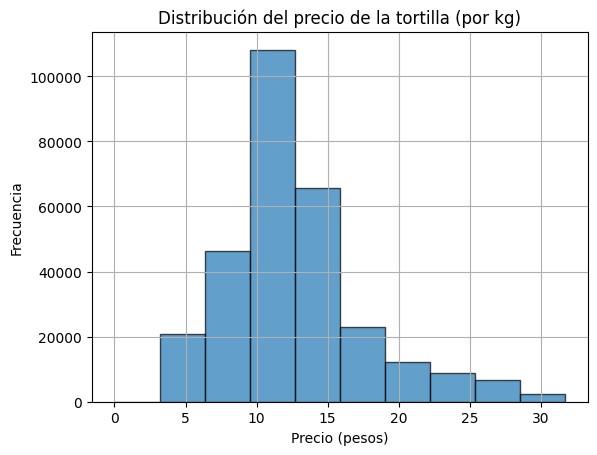

In [25]:
import matplotlib.pyplot as plt

# Histograma del precio por kilogramo
df_limpio['Precio por kilogramo'].hist(bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribución del precio de la tortilla (por kg)')
plt.xlabel('Precio (pesos)')
plt.ylabel('Frecuencia')
plt.show()

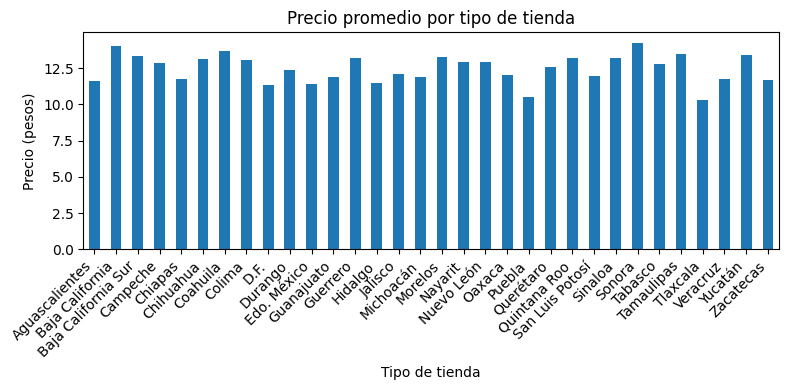

In [27]:
# Gráfico de barras: precio promedio por tipo de tienda
precio_tienda = df_limpio.groupby('Estado')['Precio por kilogramo'].mean()
precio_tienda.plot(kind='bar', figsize=(8, 4))
plt.title('Precio promedio por tipo de tienda')
plt.xlabel('Tipo de tienda')
plt.ylabel('Precio (pesos)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
## Resumen de comandos esenciales

| Comando | Descripción |
|---------|-------------|
| `df.head(n)` | Primeros n registros |
| `df.tail(n)` | Últimos n registros |
| `df.shape` | Dimensiones (filas, columnas) |
| `df.info()` | Tipos de datos y valores no nulos |
| `df.describe()` | Estadísticas descriptivas |
| `df['col']` | Seleccionar columna |
| `df.unique()` | Valores únicos |
| `df.value_counts()` | Conteo por categoría |
| `df[df['col'] > x]` | Filtrar por condición |
| `df.isnull().sum()` | Valores faltantes |
| `df.dropna()` | Eliminar filas con NaN |
| `df.groupby('col')` | Agrupar datos |
| `df.sort_values('col')` | Ordenar por columna |

¡Practica estos comandos y experimenta con el dataset! 🚀